In [1]:
!pip install tensorflow

You should consider upgrading via the 'D:\python3.9\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [6]:
#Build CNN Model
#Initializer
cnn=tf.keras.models.Sequential()

In [7]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[75,75,3]))

In [8]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D())

In [9]:
#Add 1 more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [11]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [12]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [13]:
#Compile the model
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#Train the model
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=5)

Epoch 1/5
250/250 [==============================] - 114s 451ms/step - loss: 0.6680 - accuracy: 0.5980 - val_loss: 0.5938 - val_accuracy: 0.6780
Epoch 2/5
250/250 [==============================] - 57s 227ms/step - loss: 0.6036 - accuracy: 0.6704 - val_loss: 0.5965 - val_accuracy: 0.6665
Epoch 3/5
250/250 [==============================] - 59s 236ms/step - loss: 0.5613 - accuracy: 0.7021 - val_loss: 0.5222 - val_accuracy: 0.7355
Epoch 4/5
250/250 [==============================] - 58s 232ms/step - loss: 0.5290 - accuracy: 0.7354 - val_loss: 0.5093 - val_accuracy: 0.7545
Epoch 5/5
250/250 [==============================] - 58s 231ms/step - loss: 0.5020 - accuracy: 0.7533 - val_loss: 0.5043 - val_accuracy: 0.7460


In [15]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("dataset/single_prediction/predict2.jpg",target_size=(75,75))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'
    
    

In [16]:
prediction

'dog'

In [17]:
import matplotlib.pyplot as plt
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


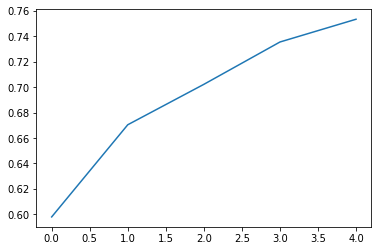

In [18]:
plt.plot(history.history['accuracy'])